In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file from Google Drive
import pandas as pd
train_data_set = pd.read_csv('/content/drive/My Drive/train_data.txt', sep=":::", names=['movie', 'genre', 'description'], engine='python')

# Display the first few rows of the dataset
train_data_set.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,movie,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
train_data_set.shape

(54214, 3)

In [4]:
import pandas as pd
test_data_set = pd.read_csv('/content/drive/My Drive/test_data_solution.txt', sep=":::", names=['movie', 'genre', 'description'], engine='python')

# Display the first few rows of the dataset
test_data_set.head()

,movie,genre,description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [5]:
test_data_set.shape

(54200, 3)

In [6]:
print(train_data_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [7]:
print(test_data_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54200 non-null  object
 1   genre        54200 non-null  object
 2   description  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [8]:
train_data_set.isnull().sum()

movie          0
genre          0
description    0
dtype: int64

In [9]:
test_data_set.isnull().sum()

movie          0
genre          0
description    0
dtype: int64

In [10]:
train_data_set.describe()

,movie,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [11]:
test_data_set.describe()

,movie,genre,description
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


In [12]:
train_data_set.loc[:,'description'] = train_data_set['description'].astype(str).str.lower()
test_data_set.loc[:,'description'] = test_data_set['description'].astype(str).str.lower()

In [13]:
train_data_set.drop(columns=['movie'], inplace = True)
test_data_set.drop(columns=['movie'], inplace = True)

In [14]:
train_data_set.duplicated().sum()

110

In [15]:
test_data_set.duplicated().sum()

114

In [16]:
train_data_set = train_data_set.drop_duplicates()
test_data_set = test_data_set.drop_duplicates()
print('check train data after drop duplicate :',train_data_set.duplicated().sum())
print('check test data after drop duplicate :',test_data_set.duplicated().sum())

check train data after drop duplicate : 0
check test data after drop duplicate : 0


<function matplotlib.pyplot.show(close=None, block=None)>

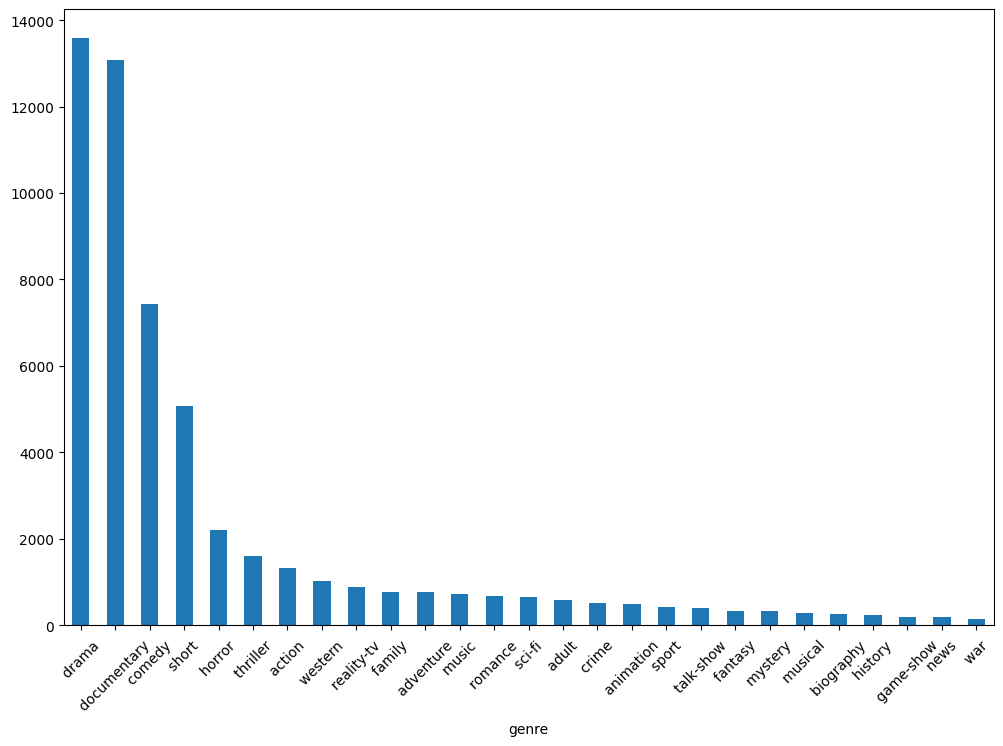

In [17]:
genre_value_counts=train_data_set['genre'].value_counts()
plt.figure(figsize=(12,8))
genre_value_counts.plot(kind='bar')
plt.title='Distribution of Movies Genre'
plt.xlabel='Genre'
plt.ylabel='No. of Movies'
plt.xticks(rotation=45)
plt.show

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate features and labels
X_train_full = train_data_set['description']
y_train_full = train_data_set['genre']
X_test = test_data_set['description']
y_test = test_data_set['genre']

# Vectorize the text descriptions
vectorizer = TfidfVectorizer()
X_train_full_vec = vectorizer.fit_transform(X_train_full)
X_test_vec = vectorizer.transform(X_test)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full_vec, y_train_full, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_val = lr.predict(X_val)

# Evaluate the Logistic Regression classifier on validation data
print("Logistic Regression Classifier Accuracy (Validation):", accuracy_score(y_val, y_pred_val))
print("Logistic Regression Classifier Report (Validation):")
print(classification_report(y_val, y_pred_val))


Logistic Regression Classifier Accuracy (Validation): 0.5870991590426023
Logistic Regression Classifier Report (Validation):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.42      0.13      0.20       271
       adult        0.76      0.16      0.27       118
   adventure        0.69      0.14      0.24       141
   animation        1.00      0.04      0.07        84
   biography        0.00      0.00      0.00        54
      comedy        0.53      0.60      0.57      1445
       crime        0.33      0.01      0.02        88
 documentary        0.66      0.88      0.76      2685
       drama        0.53      0.81      0.64      2720
      family        0.82      0.06      0.12       145
     fantasy        0.00      0.00      0.00        57
   game-show        0.80      0.40      0.53        40
     history        0.00      0.00      0.00        52
      horror        0.67      0.54      0.60       429
       music        0.78      0.30      0.44       148
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        89
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Make predictions on the test data
y_pred_test = lr.predict(X_test_vec)

# Evaluate the Logistic Regression classifier on test data
print("Logistic Regression Classifier Accuracy (Test):", accuracy_score(y_test, y_pred_test))
print("Logistic Regression Classifier Report (Test):")
print(classification_report(y_test, y_pred_test))


Logistic Regression Classifier Accuracy (Test): 0.5817401915467958
Logistic Regression Classifier Report (Test):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.55      0.23      0.32      1314
       adult        0.62      0.17      0.27       590
   adventure        0.75      0.12      0.21       773
   animation        0.60      0.01      0.02       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.58      0.56      7437
       crime        0.73      0.02      0.03       505
 documentary        0.66      0.88      0.75     13085
       drama        0.53      0.80      0.63     13565
      family        0.54      0.05      0.10       774
     fantasy        0.33      0.00      0.01       322
   game-show        0.92      0.45      0.60       193
     history        0.00      0.00      0.00       243
      horror        0.66      0.53      0.59      2204
       music        0.69      0.37      0.48       720
     musical        1.00      0.00      0.01       273
     mystery        0.00      0.00      0.00       318
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_val_svm = svm.predict(X_val)

# Evaluate the SVM classifier on validation data
print("SVM Classifier Accuracy (Validation):", accuracy_score(y_val, y_pred_val_svm))
print("SVM Classifier Report (Validation):")
print(classification_report(y_val, y_pred_val_svm))

# Make predictions on the test data
y_pred_test_svm = svm.predict(X_test_vec)

# Evaluate the SVM classifier on test data
print("SVM Classifier Accuracy (Test):", accuracy_score(y_test, y_pred_test_svm))
print("SVM Classifier Report (Test):")
print(classification_report(y_test, y_pred_test_svm))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the text descriptions
vectorizer = TfidfVectorizer()
X_train_full_vec = vectorizer.fit_transform(X_train_full)
X_test_vec = vectorizer.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_val_nb = nb.predict(X_val)

# Evaluate the Naive Bayes classifier on validation data
print("Naive Bayes Classifier Accuracy (Validation):", accuracy_score(y_val, y_pred_val_nb))
print("Naive Bayes Classifier Report (Validation):")
print(classification_report(y_val, y_pred_val_nb))

# Step 4: Evaluate on Test Data
# Make predictions on the test data
y_pred_test_nb = nb.predict(X_test_vec)

# Evaluate the Naive Bayes classifier on test data
print("Naive Bayes Classifier Accuracy (Test):", accuracy_score(y_test, y_pred_test_nb))
print("Naive Bayes Classifier Report (Test):")
print(classification_report(y_test, y_pred_test_nb))